# Dalitz

Let's try to fit some Dalitz data. To start with it's probably simpler to generate a model with `zfit` itself and fit it back.

## Decay

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the following intermediate resonances:
- $D^0 \to K^0_S \rho(770)$
- $D^0 \to K^{*-}\pi^+$

### Phasespace
At first, we should be able to generate the correct phase-space. 
In this decay, it is defined by the two invariant mass paramenters 

$$
m^2_{12}= m^2(K^0_S\pi^+)\qquad m^2_{13}= m^2(K^0_S\pi^-)
$$

In [1]:
#Import modules
import zfit
import mplhep
import numpy as np

/Users/maurizio/Software/zfit/lib/python3.11/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
import os, sys
sys.path.append(f'{os.environ["PWD"]}/utilities')
from dalitz import DalitzKinematics

In [3]:
# Define Observables
mKS = 0.495
mPi = 0.13957
mDz = 1.864
decay = DalitzKinematics(mDz, [mPi,mKS,mPi])
mp = zfit.Space("mp", limits=(decay.mSqMin([0,1]), decay.mSqMax([0,1])))
mn = zfit.Space("mn", limits=(decay.mSqMin([1,2]), decay.mSqMax([1,2])))
mz = zfit.Space("mz", limits=(decay.mSqMin([0,2]), decay.mSqMax([0,2])))

Plot the phase space

In [4]:
import matplotlib.pyplot as plt

/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:169: RuntimeWarning: invalid value encountered in sqrt
  Ymin= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)+ np.sqrt(Est3*Est3-m3Sq),2)
/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:170: RuntimeWarning: invalid value encountered in sqrt
  Ymax= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)- np.sqrt(Est3*Est3-m3Sq),2)


Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

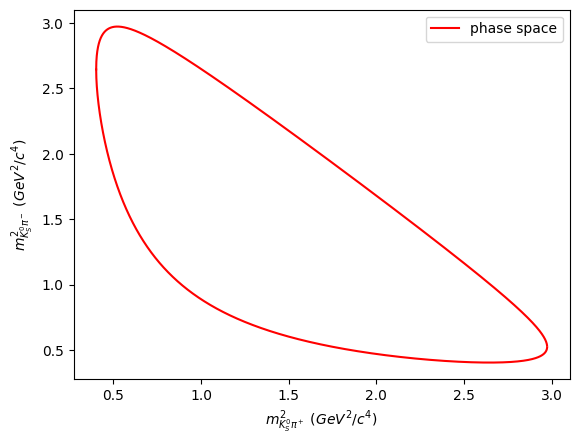

In [5]:
X, Yl, Yh = decay.Contour([0,1],10000)
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

Generate events to fill the phase space

In [6]:
import phasespace
from phasespace import GenParticle

In [7]:
genPip = GenParticle('pi+', mPi)
genPim = GenParticle('pi-', mPi)
genKS  = GenParticle('KS' , mKS)
genDz  = GenParticle('D0' , mDz)
genDz.set_children(genPip,genKS,genPim)
#weights, particles = phasespace.nbody_decay(mDz,[mPi,mKS,mPi]).generate(n_events=1000)
weights, particles = genDz.generate(n_events=1000)

I0000 00:00:1716799239.061976   43866 service.cc:145] XLA service 0x600001838400 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716799239.062024   43866 service.cc:153]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1716799239.080983   43866 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [8]:
particles

{'pi+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.48319352, -0.10275689, -0.59321173,  0.78448384],
        [ 0.2966933 ,  0.60904073, -0.35173544,  0.77598655],
        [-0.2144812 ,  0.09713171,  0.12685114,  0.30167491],
        ...,
        [-0.10932103, -0.0159754 ,  0.27482746,  0.32743888],
        [-0.36036627, -0.02816959, -0.33401062,  0.51156647],
        [ 0.05728939,  0.09517764, -0.1228509 ,  0.21659406]])>,
 'KS': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.41506603,  0.22923804,  0.53904964,  0.87202603],
        [-0.17201453, -0.56791868,  0.42613812,  0.88246208],
        [ 0.15763402, -0.22778752, -0.73147988,  0.92564759],
        ...,
        [ 0.65232081,  0.24257804, -0.35821521,  0.92612617],
        [-0.05288523, -0.169355  , -0.26233825,  0.58764302],
        [ 0.51499043, -0.02389869, -0.43193573,  0.83509267]])>,
 'pi-': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.06812749, -0.12648114,  0.05416209, 

In [9]:
pPiPi = particles['pi+']+particles['pi-']
pKSPip = particles['pi+']+particles['KS']
pKSPim = particles['pi-']+particles['KS']

In [10]:
import tf_kinematics as tfk

In [11]:
tfk.M(pPiPi).numpy()

array([0.68454946, 0.65551687, 0.51836936, 0.84828706, 0.63787604,
       1.07454319, 0.96245048, 0.78928956, 0.34398407, 0.64416192,
       0.45526316, 0.68628801, 1.14006444, 0.50004748, 1.13723891,
       0.34330139, 0.36784184, 0.85387005, 1.15582016, 0.67112977,
       0.6687807 , 0.30532914, 0.54473091, 0.97712588, 0.82857219,
       0.35490451, 0.40206508, 1.26945865, 0.94127284, 0.98208469,
       1.3557945 , 1.15698989, 1.16228385, 1.16831223, 0.69408508,
       0.59750516, 0.56650378, 0.97132625, 0.93608458, 0.40755113,
       0.60966884, 0.34819249, 0.77542041, 0.66748638, 0.56252887,
       0.3283447 , 1.16945804, 1.32853288, 0.6937494 , 0.69119486,
       0.80918403, 0.93849636, 0.80730649, 0.48485169, 0.83180233,
       1.14527683, 1.07601436, 0.84074127, 0.53881532, 0.97291627,
       0.69969478, 0.57632554, 0.39107584, 1.2023981 , 0.35195912,
       0.63707857, 0.3064642 , 0.61046391, 0.81536316, 0.95325832,
       0.83210848, 0.99290689, 1.01947258, 1.27172666, 0.50313

In [12]:
mSqP = tfk.M2(pKSPip).numpy()
mSqN = tfk.M2(pKSPim).numpy()
mSqZ = tfk.M2(pPiPi).numpy()
mP = tfk.M(pKSPip).numpy()
mN = tfk.M(pKSPim).numpy()
mZ = tfk.M(pPiPi).numpy()

Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

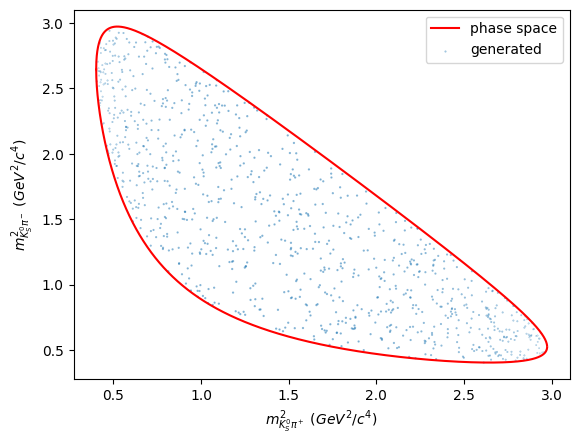

In [13]:
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.scatter(mSqP,mSqN,label='generated', s=weights.numpy(), alpha=0.5)
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

## Generate Data with a Model
Let's first import a relativistic Breit Wigner PDF from [zfit-physics](https://github.com/zfit/zfit-physics/tree/develop)

In [14]:
import zfit_physics as zphys

In [15]:
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn )
rhoks = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz )

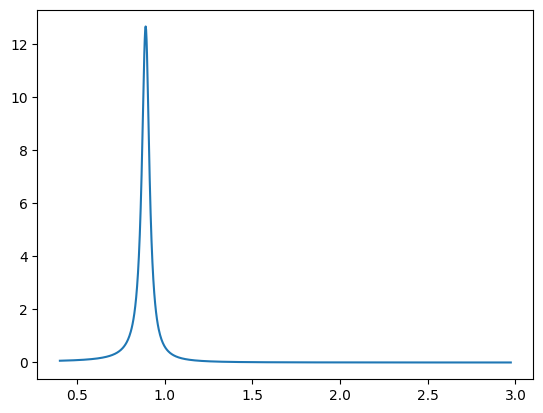

In [16]:
x = np.linspace(mn.limits[0][0][0], mn.limits[1][0][0], 1000)
plt.figure()
y = kstmpi.pdf(x).numpy()
plt.plot(x,y)

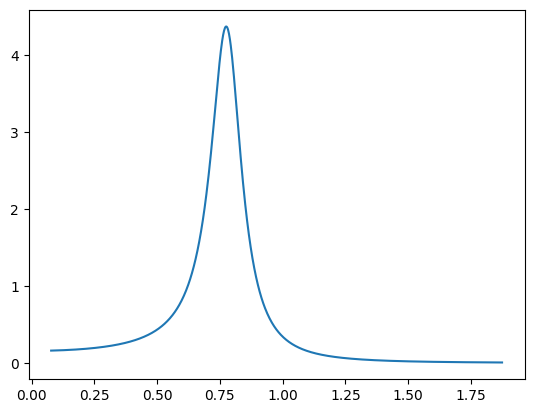

In [17]:
x = np.linspace(mz.limits[0][0][0], mz.limits[1][0][0], 1000)
plt.figure()
y = rhoks.pdf(x).numpy()
plt.plot(x,y)

Create a model:
$$
f(\vec{x}) = f_{NR} + (1-f_{NR})\left(f_{\rho}\text{BW}_{\rho}(\vec{x}) + (1-f_{\rho})\text{BW}_{K^*}(\vec{x})\right)
$$

In [18]:
# fractions
f_NR  = zfit.Parameter("f_NR" , 0.3, 0, 1)
f_rho = zfit.Parameter("f_rho", 0.6, 0, 1)

In [19]:
z_mMother = zfit.Parameter("mMother", mDz)
z_m1 = zfit.Parameter("m1", mPi)
z_m2 = zfit.Parameter("m2", mKS)
z_m3 = zfit.Parameter("m3", mPi)


In [20]:
dp_params_init = {'mMother':  mDz, 'm1': mPi, 'm2': mKS, 'm3': mPi}
dp_params = {name: zfit.Parameter(name, val) for name, val in dp_params_init.items()}

In [21]:
from pdfs import DalitzUniform
# PDFs
nr = DalitzUniform(obs=mn*mp, **dp_params)
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn ) * nr
#rhoks = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz ) * nr
# nr    = zfit.pdf.Uniform(low =mn.limits[0][0][0],high=mn.limits[1][0][0], obs=mn) * \
#         zfit.pdf.Uniform(low =mp.limits[0][0][0],high=mp.limits[1][0][0], obs=mp)

# model
model = zfit.pdf.SumPDF([nr, kstmpi], fracs=[f_NR])

In [22]:
# Generate some data following the model above
n_sample = 10000
#data = model.create_projection_pdf(obs=mn*np).create_sampler(n_sample, limits=mn*mp)
data = model.create_sampler(n_sample, limits=mn*mp)
data.resample()

/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:169: RuntimeWarning: invalid value encountered in sqrt
  Ymin= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)+ np.sqrt(Est3*Est3-m3Sq),2)
/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:170: RuntimeWarning: invalid value encountered in sqrt
  Ymax= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)- np.sqrt(Est3*Est3-m3Sq),2)


(0.0, 1.0, 0.0, 1.0)

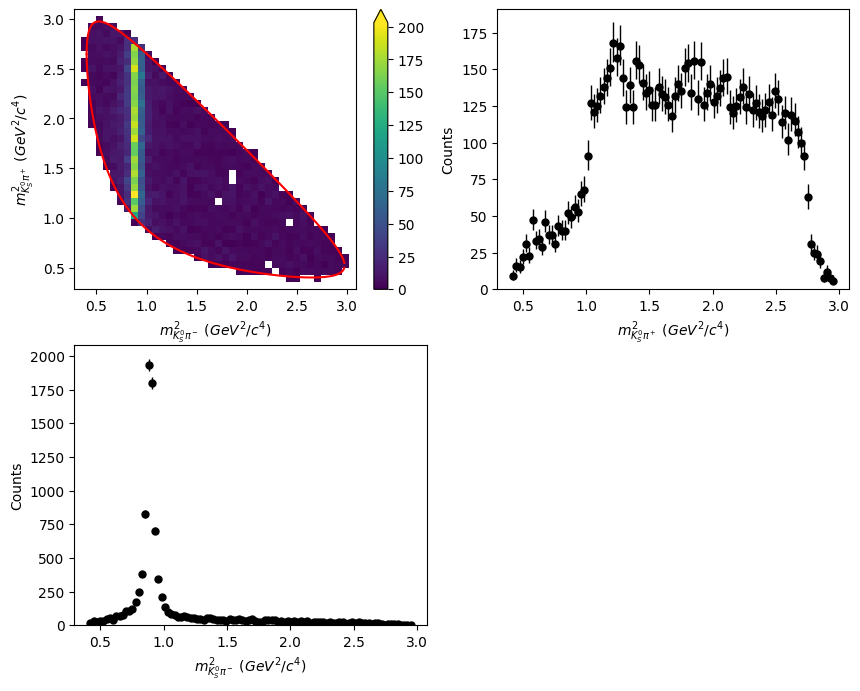

In [23]:
data_np = data.numpy()
fig, ax = plt.subplots(2,2,figsize=(10, 8))
decay.Plot(data_np[:,0],data_np[:,1],ax=ax[0][0],bins=40)
decay.PlotBoundary(ax[0][0],[0,1],1000)
ax[0][0].set_xlabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')
ax[0][0].set_ylabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
# project the data on the x axis
mplhep.histplot(
        np.histogram(data_np[:,0], bins=100),
        yerr=True,
        color="black",
        histtype="errorbar",
        ax = ax[1][0]
    )
ax[1][0].set_ylabel("Counts")
ax[1][0].set_xlabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')
# project the data on the y axis
mplhep.histplot(
        np.histogram(data_np[:,1], bins=100),
        yerr=True,
        color="black",
        histtype="errorbar",
        ax = ax[0][1]
    )
ax[0][1].set_ylabel("Counts")
ax[0][1].set_xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
# Turn off the axis for the subplot at position [1, 1] to make it completely blank
ax[1, 1].axis('off')

In [24]:
from pdfs import DalitzUniformThreeObs
# PDFs
nr3 = DalitzUniformThreeObs(obs=mn*mp*mz, **dp_params)
kstmpi3= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn ) * nr3
rhoks3 = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz ) * nr3
# nr    = zfit.pdf.Uniform(low =mn.limits[0][0][0],high=mn.limits[1][0][0], obs=mn) * \
#         zfit.pdf.Uniform(low =mp.limits[0][0][0],high=mp.limits[1][0][0], obs=mp)

# model
model3 = zfit.pdf.SumPDF([nr3, kstmpi3, rhoks3], fracs=[f_NR, f_rho])

In [ ]:
# Generate some data following the model above
n_sample = 10000
#data = model.create_projection_pdf(obs=mn*np).create_sampler(n_sample, limits=mn*mp)
data3 = model3.create_sampler(n_sample, limits=mn*mp*mz)
data3.resample()

In [ ]:
data_np3 = data3.numpy()
fig, ax = plt.subplots(2,2,figsize=(10, 8))
decay.Plot(data_np3[:,0],data_np3[:,1],ax=ax[0][0],bins=40)
decay.PlotBoundary(ax[0][0],[0,1],1000)
ax[0][0].set_xlabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')
ax[0][0].set_ylabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
# project the data on the x axis
mplhep.histplot(
        np.histogram(data_np3[:,0], bins=100),
        yerr=True,
        color="black",
        histtype="errorbar",
        ax = ax[1][0]
    )
ax[1][0].set_ylabel("Counts")
ax[1][0].set_xlabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')
# project the data on the y axis
mplhep.histplot(
        np.histogram(data_np3[:,1], bins=100),
        yerr=True,
        color="black",
        histtype="errorbar",
        ax = ax[0][1]
    )
ax[0][1].set_ylabel("Counts")
ax[0][1].set_xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
# Turn off the axis for the subplot at position [1, 1] to make it completely blank
ax[1, 1].axis('off')